
# Project: NO-SHOW HOSPITAL APPOINTMENTS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The dataset used in the project is the no show appointments csv file sourced from Kaggle. The data is based on the presence or absence to a hospital appointment in varying neighborhoods across Brazil. Various characteristics have been included such as patient demographics, schedule and appointment dates, named comobidities, and whether the patient was on scholarship, but to mention a few. The scholarship program in mention, is the social welfare program of the Government of Brazil, aimed at assisting poor families in Brazil.
>
>Investigations on how these characteristics may contribute to the absence to a hospital appointment, are at the projects main core. Firstly, are there more people than not, who do not show up for their appointment? Does the data show patterns of who is likely to attend or miss an appointment? Are Individuals on scholarship more likely to attend an appointment than individuals not on scholarship? What days of the week are people more likely to miss an appointment? What groups have been associated with higher rates of absentia, females or males, alcholics or non-alcholics, those with known health-related probelms, or a particular age range?

In [1]:
#Importing libraries to be used during project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv",parse_dates=['AppointmentDay','ScheduledDay'])

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Some columns have some spelling erros such as Hypertension and Handicap, corrections to be made. The Values 0 and 1 under the categorical columns will be changed to 'No' and 'Yes' respectively for easier communication.

In [4]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
sum(df.duplicated())

0

>The dataset has neither missing values nor duplicates

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>The Age column appears to have a couple of irregularities. The Min Age is -1 (could be due to error), and Max Age 115. Outliers in this column will need to be visualized and taken out.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

> All columns have the appropriate data type. An additional column will be added for easier data manipulation; the weekdays associated with the appointment dates.

### Data Cleaning 
> All changes discussed above to be executed here:
<ul>
    <li> Correcting Misspellings in Column headers </li>
    <li> Converting 0 and 1 values to 'No' and 'Yes </li>
    <li> Getting rid of outliers in the Age column </li>
    <li> Addition of appointment day of week column </li>
</ul>

In [8]:
#Correcting column header spellings

df.rename(columns = {"Hipertension": "Hypertension", "Handcap":"Handicap", "No-show":"No_show"},inplace = True)

#No-show coverted to No_show to avoid confusion with the minus(-) operator.

In [9]:
#Coverting 0 and 1 to 'No' and 'Yes' respectively

df = df.replace(to_replace=[0,1],value = ['No','Yes']) # This operation will change all instances of 0 and 1 values
df = df.replace({'Age':{'No':0,'Yes':1}})              # In the event the Age column has a 0 and 1 value, that too may be affected.
df['Age'] = df['Age'].astype(int)                    # All computations on the Age column will require Age to be an int datatype

In [10]:
df['Handicap'].value_counts() # Handicap appears to have more categorical values than the simple boolean

No     108286
Yes      2042
2         183
3          13
4           3
Name: Handicap, dtype: int64

In [11]:
df = df[(df.Handicap != 2) & (df.Handicap != 3) & (df.Handicap != 4)] #The values are significantly less, so they may be dropped

In [12]:
df.info() # Just to confirm all changes have been executed correctly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110328 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110328 non-null  float64            
 1   AppointmentID   110328 non-null  int64              
 2   Gender          110328 non-null  object             
 3   ScheduledDay    110328 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110328 non-null  datetime64[ns, UTC]
 5   Age             110328 non-null  int32              
 6   Neighbourhood   110328 non-null  object             
 7   Scholarship     110328 non-null  object             
 8   Hypertension    110328 non-null  object             
 9   Diabetes        110328 non-null  object             
 10  Alcoholism      110328 non-null  object             
 11  Handicap        110328 non-null  object             
 12  SMS_received    110328 non-null  object             
 13  No_show       

In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


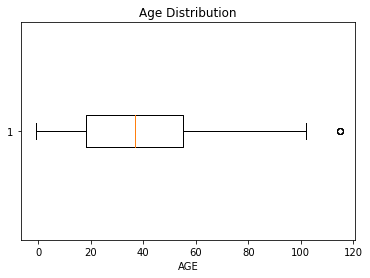

In [14]:
# Visualizing the outliers in the Age Column
plt.boxplot(df['Age'], vert = False)
plt.xlabel("AGE")
plt.title("Age Distribution");

In [15]:
df = df[(df['Age'] <= 100) & (df['Age'] >= 0)] #Taking out the outlier data point
                                               #Age can not be negative, so setting the min Age to 0

In [16]:
df['Appointment_day'] = df['AppointmentDay'].dt.day_name() #Adding appointment week day column

### Data Manipulation Helpers
> Create a few functions to help us easily manipulate data and reduce repetitve code.
<ul>
    <li> ezy_extract: For easier subsetting of data </li>
    <li> ezy_val_count: For easier value count of subsetted data on the No_show column </li>

In [17]:
def ezy_extract(df,col,val):
    if val == "Yes":
        return df[df[col] == 'Yes']
    else:
        return df[df[col] == 'No']

In [18]:
def ezy_val_count(df,col,val):
    result = ezy_extract(df,col,val)['No_show'].value_counts() 
    return result

<a id='eda'></a>
## Exploratory Data Analysis


### Are there more people who did not show up for their hospital appointment?

In [19]:
no_show = df['No_show'].value_counts()
no_show

No     88045
Yes    22275
Name: No_show, dtype: int64

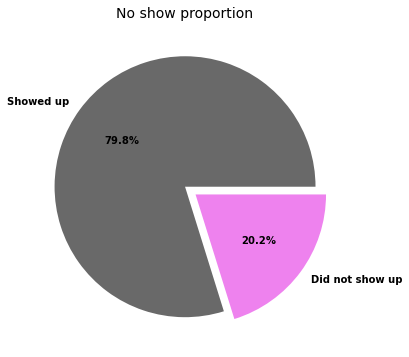

In [20]:
colors = ['dimgrey','Violet',]
labels = ['Showed up','Did not show up']
text_props = {"weight": "bold"}
explode = [0,0.1]
fig = plt.figure(figsize=(6, 6))

plt.pie(no_show,colors=colors,autopct='%1.1f%%',labels=labels,textprops=text_props,explode=explode)
plt.title("No show proportion",fontsize = 14);

Nearly 80% of the population show up for their hospital appointment. It would be worth investigating what constitutes the 20% that do not show up.

### Are Individuals on scholarship more likely to attend an appointment than individuals not on scholarship?

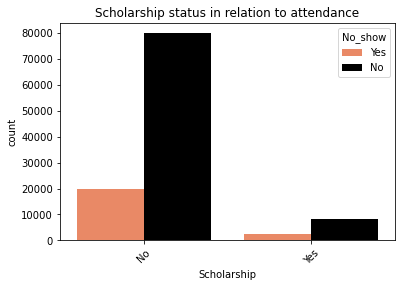

In [21]:
hue_colors = {'Yes': 'coral', 'No':'black'}
sns.countplot(x='Scholarship', 
              data=df, 
              hue = 'No_show',
              palette = hue_colors, 
              hue_order = ['Yes', 'No'])
plt.xticks(rotation = 45)
plt.title("Scholarship status in relation to attendance")
plt.show()

The data shows a huge proportion of individuals were not on scholarship. Because the data is not evenly split between those on scholarship, and those not on scholarship, it would be better to compare the percentages of those on scholarship who did not attend the appointment, and do likewise for those not on scholarship.

In [22]:
scholar_no_show = ezy_val_count(df,'Scholarship',"Yes") #Number of scholarship recepients who either showed up or didn't show up
Not_scholar_no_show = ezy_val_count(df,'Scholarship',"No") #Not on scholarship

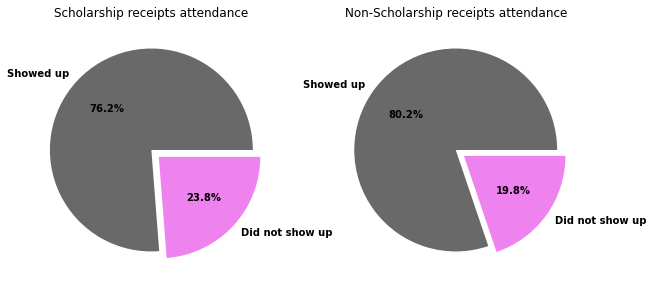

In [23]:
colors = ['dimgrey','Violet']
fig, axes = plt.subplots(1, 2, figsize=(10,10))
labels = ['Showed up','Did not show up']

for ax,val,title in zip(axes,(scholar_no_show,Not_scholar_no_show),('Scholarship receipts attendance','Non-Scholarship receipts attendance')):
    ax.pie(val,labels = labels, colors = colors, autopct ='%1.1f%%',textprops = text_props, explode = explode)
    ax.set_title(title)

The results were close. However scholarship recepients have a slighter larger percentage of individuals who did not show up for their appointment, contrary to what was initially assumed. Hence the piechart did infact give much greater detail compared to the barplot, which could have led to misleading conclusions.

### What days of the week are people more likely to miss an appointment?

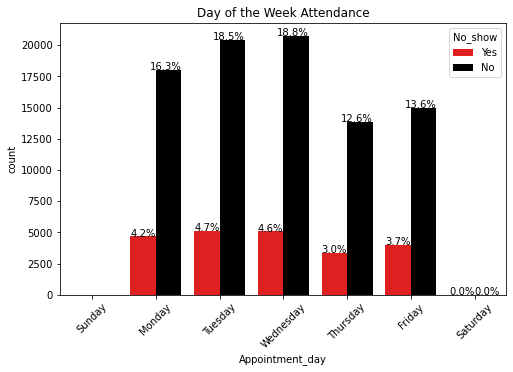

In [24]:
hue_colors = {'Yes': 'Red', 'No':'Black'}
plt.figure(figsize=(8,5))
total = float(len(df))

ax = sns.countplot(x='Appointment_day', 
              data=df, 
              hue = 'No_show',
              palette = hue_colors, 
              hue_order = ['Yes', 'No'],
              order = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xticks(rotation = 45)
plt.title("Day of the Week Attendance")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()


The days, Tuesday and Wednesday appear to have larger numbers of people who did not show up for their appointment, followed closely by monday. It is tempting to conclude that the early weekdays receive a larger volumn of missed appointments compared to the weekdays closest to the weekend. Perhaps because patients are at their busiest during the start of a week making it difficult to recall an appointment or carve out time to attend it.

### What does the Age distribution tell us about the appointment attendance?


In [25]:
no_show_no = ezy_extract(df,'No_show',"No")  # Extracting instances where patients showed up to appointments
no_show_yes = ezy_extract(df,'No_show',"Yes") # Extracting instances where patients did not showed up to appointments

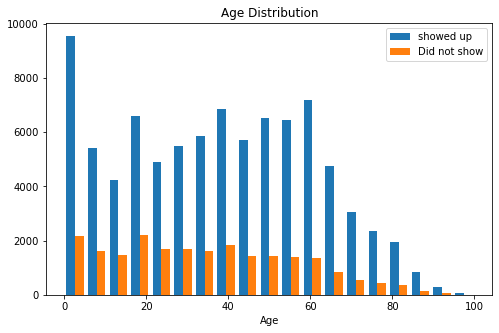

In [26]:
age_show_yes = no_show_no['Age']  #Ages that showed up to appointment
age_show_no = no_show_yes['Age']  #Ages that did not showed up to appointment
bins = np.linspace(0,100,20)
plt.figure(figsize=(8,5))

plt.hist([age_show_yes, age_show_no], bins, label=['showed up', 'Did not show'])
plt.legend(loc='upper right')
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()


Patients below the Age of 5, had markedly high attendance in regards to hospital appointments. Being infants, parental concern may have contributed to the large figures. However, indivials in their 20s and the very individuals under 5, battled for top place in no-show to hospital appointments, followed closely by those in their 40s.The two top age groups pose no similarity hence the information is inconclusive.

### Do all categorical columns follow the 20:80 distribution displayed by the overall no-show category? Are certain categories more prone to missing an appointment?

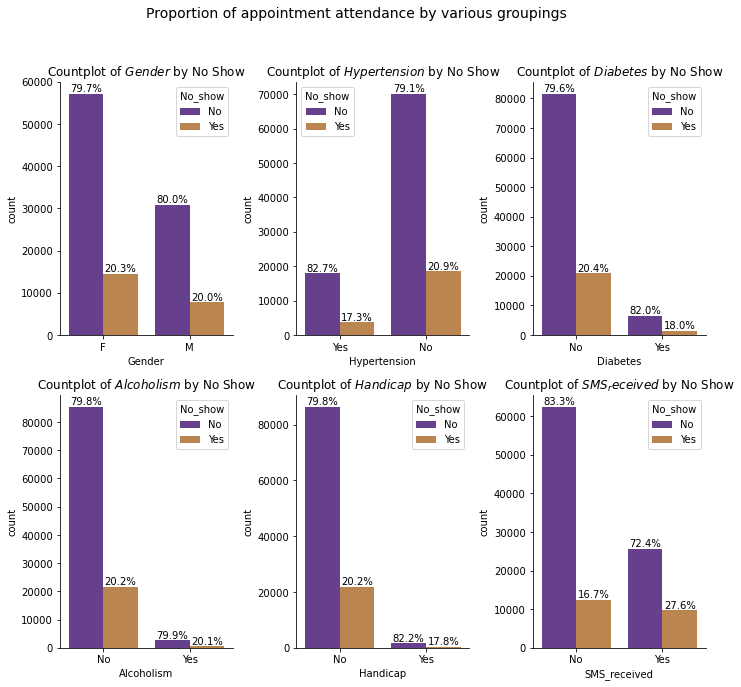

In [27]:
"""
The following block of code creates subplots for each categorical column in the dataset.
First some aesthetic features are defined, followed by a for-loop which gathers the no-show value counts of each category.
The categories in question are: 'Gender', 'Hypertension', 'Diabetes', 'Alcoholism','Handicap','SMS_received'.
Then the countplot is created and the for-loop following it, simply adds the percentages associated with each group.
To avoid subplot overlap, the plt.tight_layout, was called out

"""

hue_colors = {'Yes': 'peru', 'No':'rebeccapurple'}
features = ['Gender', 'Hypertension', 'Diabetes', 'Alcoholism','Handicap','SMS_received']
hue = 'No_show'
hue_type = df[hue].dtype.type

fig, axs = plt.subplots(2, 3, figsize=(10, 10))

fig.suptitle('Proportion of appointment attendance by various groupings',fontsize=14)

for feat, ax in zip(features, axs.ravel()):
    # group ordering differs by dtype
    col = df[feat]
    if col.dtype == 'category':
        groups = col.cat.categories
    elif col.dtype == 'bool':
        groups = [False, True]
    else:
        groups = col.unique()
    proportions = df.groupby(feat)[hue].value_counts(normalize=True)
    
    sns.countplot(x=feat, hue=hue, data=df, ax=ax,palette = hue_colors)
    ax.set_title(f'Countplot of ${feat}$ by No Show')
    sns.despine()

    for c in ax.containers:
        labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
        ax.bar_label(c, labels)
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Astonishingly, individuals with known health problems such as; Hypertension, Diabetes and the Handicapped, showed an approximate 2-3% slight reduction in the number of missed appointments.
While every category followed the 20:80 pattern, the SMS_received group on the other hand exhibited a different outcome. Individuals who did infact receive an SMS to attend an appointment, ended up with a larger percentage of absence, contrary to what should have been the normal outcome. In the normal outcome, it would be expected that the SMS message helped remind patients of their appointment and hence lower the number of those who miss their appointment.

<a id='conclusions'></a>
## Conclusions

The Findings for the project suggested that generally 20% of Individuals missed their hospital appointment and this held true even when deeper dive into the individual categories was conducted. However findings showed, people are more likely to miss an appointment if the day falls onto the start of a week such as Tuesday or wednesday. This does not explicitly confirm that early week days are associated with higher absence as the weekends have little to none scheduled appointment dates. 

Ironically, people on scholarship had a roughly 4% higher figure of absconding from appointments. This was not expected as it can be assumed the reverse should have been true because scholarship recipients risk losing their scholarhsip if they are not compliant with the terms associted with the accordance of the scholarship.

Individuals with known health related problems, i.e hypertension, Diabetes and the handicap, had a slightly better outcome compared to the rest of the categories. They had an estimated 2-3% reduction in the number of missed appointments compared to other categories. However having a known health related problem does not imply causation to adherence of appointments.

Gender and Aloholism groups followed the overall general no-show distribution.

When it came to age, children below 5 had markedly high attendance and surprisingly high absence compared to other age groups. Individuals in their 20s also showed a higher significance in absentia. Perhaps due to poor prioritisation of health as individuals in this age group have top priorities in career establishment.

Out of all the findings, the SMS_received group struck out. It was expected that reminding patients of their appointment would lead to lower instances of missed appointments, but the opposite proved true. No conclusions can be made on this discovery as more information would be required. 

### Limitations
The dataset did not explain the reason for the scheduled appointments making it difficult to come up with conclusions.It is hard to tell if individuals with known health  related problems had appointments to manage those conditions or had various comobidities. With regards to children mostly under 5, were the appointments scheduled for vaccinations, routine check-ups or known infections .Having this information would be critical as parents who did not take their children for the appointments risked the health of their children if the reason for the appointment was the latter.However if the case was a routine check-up, that would explain the hesistancy of parents to take their children for the appointments.
Information regarding the SMS was not clearly elaborated. Were the SMS messages sent out as reminders or sent after a patient missed their appointment or both?